---
title: Positional Encoding in transformers
jupyter: "positional_encoding"
description: "Positional encoding used for encoding where the tokens appear in a sentence"
author: "Shataxi Dubey"
date: "2025-07-22"
categories: [positional encoding, transformers]
format:
    html:
        toc: true
---

## Positional embedding 

Positional embedding is used to encode the position of a token in a sentence using sinusoidals.

$PE_{[k, 2i]} = sin(\frac{k}{n^\frac{2i}{d}})$

$PE_{[k, 2i + 1]} = cos(\frac{k}{n^\frac{2i}{d}})$

k is the position of the token in the sentence.
n is a constant.
i is the index in d dimensional vector. It ranges from 0 to $\frac{d}{2}$

If d is the dimension for the position embedding then the d- dimensional vector will be represented with pair of sine and cosine. Hence there will be d/2 sine-cosine pair in the vector.

$PE_k$ = $\begin{bmatrix}sin(k)\\ cos(k) \\ sin(\frac{k}{n^\frac{2}{d}})\\ cos(\frac{k}{n^\frac{2}{d}}) \\. \\. \\. \\ sin(\frac{k}{n^\frac{2\frac{d}{2}}{d}})\\ cos(\frac{k}{n^\frac{2\frac{d}{2}}{d}}) \end{bmatrix}$

sine function represents the even positions in the d-dimensional vector while cosine function represents the odd position in the d-dimensional vector.

In [71]:
import numpy as np

In [72]:
input = np.arange(100)


def encoding(idx, d):
    embedding_values = []
    for i in range(d//2):
            embedding_values.append(np.sin(idx / (1000000**(2*i/d))))
            embedding_values.append(np.cos(idx / (1000000**(2*i/d))))
    return np.array(embedding_values)


def final():
      final_embedding = []
      for i in range(100):
            final_embedding.append(encoding(i, 512))
      return np.array(final_embedding)
            
x = final()

Text(0, 0.5, 'Index of tokens')

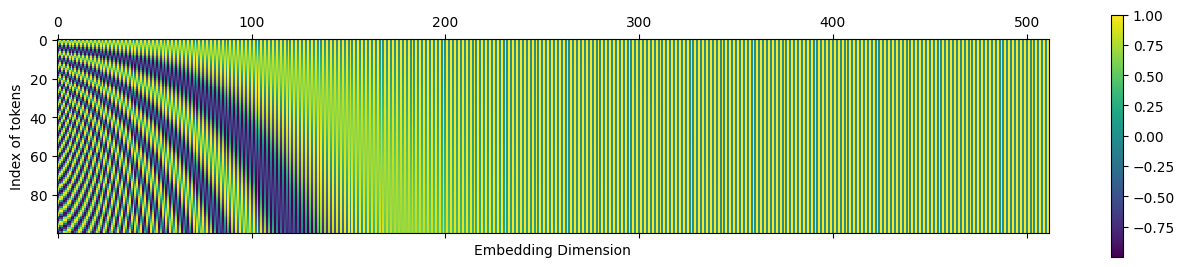

In [73]:
import matplotlib.pyplot as plt

cax = plt.matshow(x)
plt.gcf().colorbar(cax)
plt.xlabel('Embedding Dimension')
plt.ylabel('Index of tokens')


(200.0, 0.0)

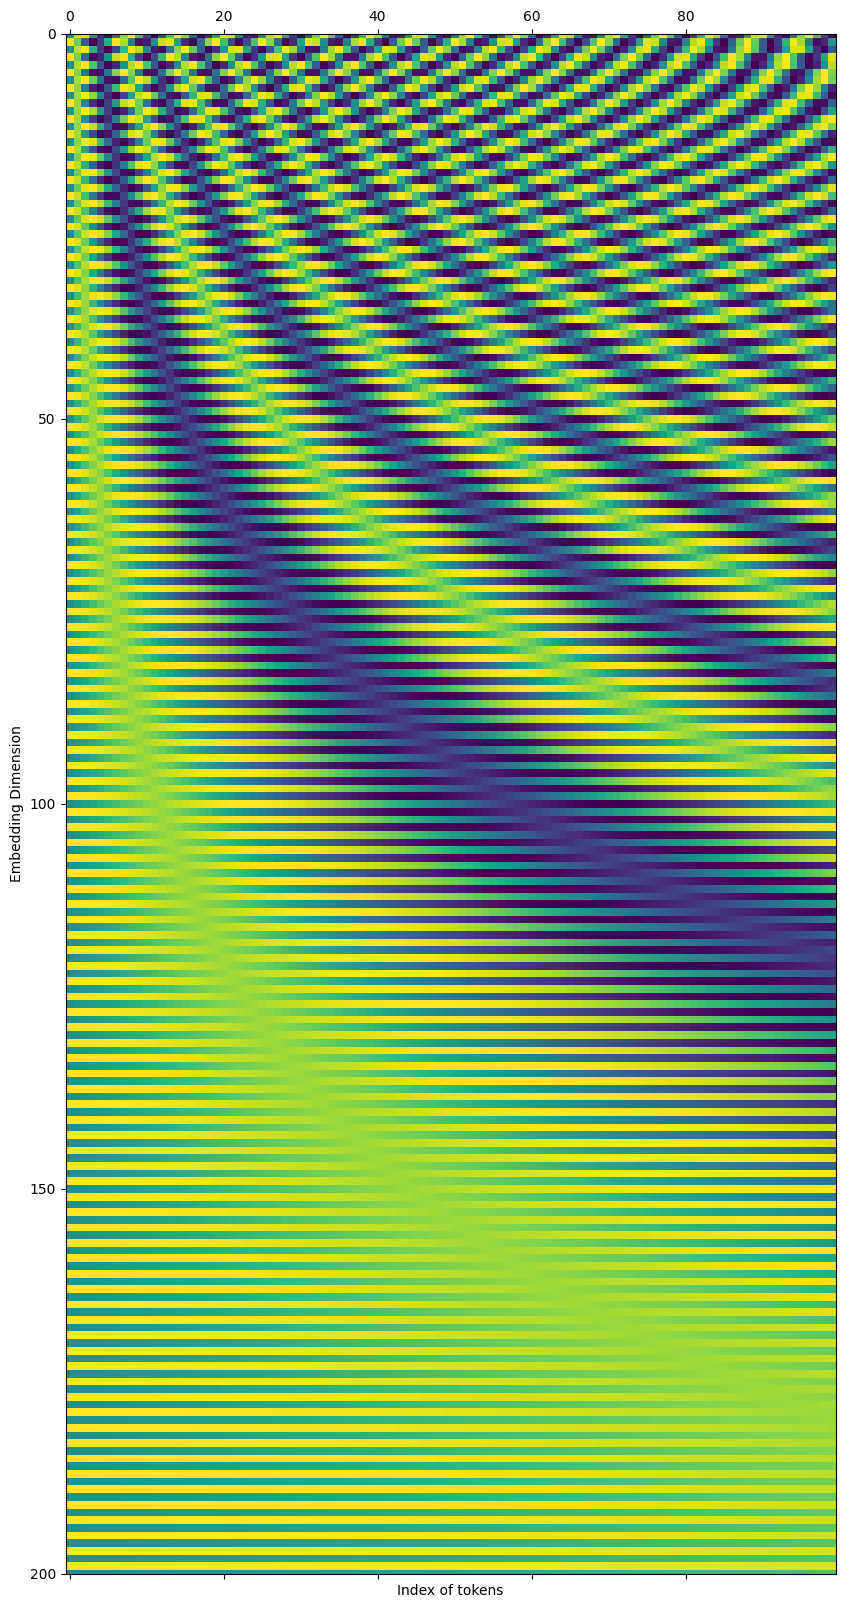

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 20))
cax = ax.matshow(x.T)
ax.set_xlabel('Index of tokens')
ax.set_ylabel('Embedding Dimension')
ax.set_ylim(200,0)

$PE_0$ = $\begin{bmatrix}0\\ 1 \\ 0\\ 1 \\. \\. \\. \\ 0 \\ 1 \end{bmatrix}$ 
$PE_1$ = $\begin{bmatrix}sin(1)\\ cos(1) \\ sin(\frac{1}{n^\frac{2}{d}})\\ cos(\frac{1}{n^\frac{2}{d}}) \\. \\. \\. \\ sin(\frac{1}{n})\\ cos(\frac{1}{n}) \end{bmatrix}$
$PE_2$ = $\begin{bmatrix}sin(2)\\ cos(2) \\ sin(\frac{2}{n^\frac{2}{d}})\\ cos(\frac{2}{n^\frac{2}{d}}) \\. \\. \\. \\ sin(\frac{1}{n})\\ cos(\frac{1}{n}) \end{bmatrix}$
$..........................................................................................$
$PE_{512}$ = $\begin{bmatrix}sin(512)\\ cos(512) \\ sin(\frac{512}{n^\frac{2}{d}})\\ cos(\frac{512}{n^\frac{2}{d}}) \\. \\. \\. \\ sin(\frac{1}{n})\\ cos(\frac{1}{n}) \end{bmatrix}$

For all $PE_{k}$, 

index i = 0 
- follows sine function with frequency 1 and wavelength $2\pi$
- follows cosine function with frequency 1 and wavelength $2\pi$

index i = 1 
- follows sine function with frequency $\frac{1}{n^\frac{2}{d}}$ and wavelength $2\pi{n^\frac{2}{d}}$
- follows cosine function with frequency $\frac{1}{n^\frac{2}{d}}$ and wavelength $2\pi{n^\frac{2}{d}}$

-
-
-

index i = d/2
- follows sine function with frequency $\frac{1}{n}$ and wavelength $2\pi{n}$
- follows cosine function with frequency $\frac{1}{n}$ and wavelength $2\pi{n}$

This shows that the sine and cosine function frequency decrease as the indices go higher in the d-dimensional vector.
We see higher variations in all the tokens for embedding index 0 ( faster changes in colour) and negligible variation for embedding index 512 (no change in colour)

Text(0, 0.5, 'Embedding dimension')

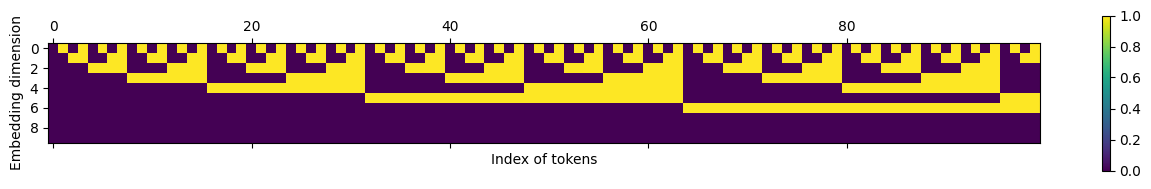

In [70]:
def binary_representation(x):
    all = []
    for i in x:
        tmp = list(np.binary_repr(i, width=10))
        tmp = np.array(tmp)
        tmp = tmp[::-1]
        all.append(tmp)
    return np.array(all)

x = binary_representation(range(100))
x = x.astype(float)  
cax = plt.matshow(x.T)
plt.gcf().colorbar(cax)
plt.xlabel('Index of tokens')
plt.ylabel('Embedding dimension')

From both the plots (related to sinusoidal function and the binary function), we cn see that index 0 of embedding dimension has the highest frequency. This shows that sinusoidal functions can represent positional embedding similar to binary representation.

We prefer sinusoidal representation because it exhibits linearity in relationship.

$W * \begin{bmatrix} sin(t) \\ cos(t) \end{bmatrix}  = \begin{bmatrix} sin(t + \theta) \\ cos(t + \theta) \end{bmatrix}$

$W * \begin{bmatrix} sin(t) \\ cos(t) \end{bmatrix}  = \begin{bmatrix} sin(t)cos(\theta) + cos(t)sin(\theta) \\ cos(t)cos(\theta) - sin(t)sin(\theta) \end{bmatrix}$

$\begin{bmatrix} cos(\theta) & sin(\theta) \\ - sin(\theta) &  cos(\theta)\end{bmatrix} * \begin{bmatrix} sin(t) \\ cos(t) \end{bmatrix}  = \begin{bmatrix} sin(t)cos(\theta) + cos(t)sin(\theta) \\ cos(t)cos(\theta) - sin(t)sin(\theta) \end{bmatrix}$

$ W = \begin{bmatrix} cos(\theta) & sin(\theta) \\ - sin(\theta) &  cos(\theta)\end{bmatrix}$


As $PE_{t}$ is known then $PE_{t + \theta}$ can also be determined
